# 12: ショアアルゴリズム

In [1]:
from renom_q import *
import math

## 12-1: 古典的因数分解アルゴリズム

古典的因数分解の方法 (N=15)

$N$よりも小さな互いに素な整数$a\in [2, N-1]=\{2, 4, 7, 8, 11, 13, 14\}$をランダムに選ぶ。

$a=7$とする。関数$f(x)=a^x\ \mathrm{mod}\ N\ (x=0, 1, 2, \dots)$を考えて、$f(x)=f(x+r)$を満たす最小の周期$r$を求める。

$$f(x)=f(x+r) \rightarrow a^x\ \mathrm{mod}\ N = a^{x+r}\ \mathrm{mod}\ N \rightarrow a^r\ \mathrm{mod}\ N =1$$

この周期$r$が偶数であれば、ユークリッドの互除法を用いて因数が見つかる。$r$が奇数であれば、再度整数$a$を選びなおす。

$$a^r\ \mathrm{mod}\ N =1 \rightarrow (a^{r/2}-1)(a^{r/2}+1)\ \mathrm{mod}\ N =0 \rightarrow 最大公約数\mathrm{gcd}(a^{r/2}\pm 1, N)を求める$$

$N=15、a=7$の時は次のように計算できる。

$$f(0)=1,\ \ f(1)=7,\ \ f(2)=4,\ \ f(3)=13,\ \ f(4)=1,\dots$$

周期$r=4$は偶数なので、

$$a^{r/2}\pm 1 = 7^{4/2} \pm 1 =\{48, 50\} \rightarrow \mathrm{gcd}(48, 15)=3,\ \ \mathrm{gcd}(50, 15)=5$$

よって、$N=15$の因数3と5が求まる。

## 12-2: 量子関数

関数$f(x)=7^x\ \mathrm{mod}\ 15$を量子関数にする。関数$f(x)=7^x\ \mathrm{mod}\ 15$に変数$x$の数値($x=0, 1, 2,...$)を入れて計算したことを2進数で表すと、下表のようになる。

|$x_0$|$x_1$|$x_2$|$y_0$|$y_1$|$y_2$|$y_3$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0|0|0|0|0|1|
|0|0|1|0|1|1|1|
|0|1|0|0|1|0|0|
| 0 |1|1|1|1|0|1|
|**1**|0|0|0|0|0|1|
|**1**|0|1|0|1|1|1|
|**1**|1|0|0|1|0|0|
|**1**|1|1|1|1|0|1|

この表を元に量子ゲートを構成していく。例えば、$x=x_0x_1x_2=000=0$では、$y=y_0y_1y_2y_3=0001=1$となるように$y_3$にビット反転演算Xを適用すれば良い。

{'0001': 255, '0100': 250, '0111': 259, '1101': 260}


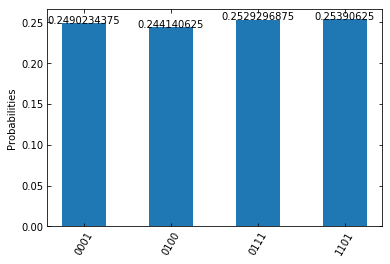

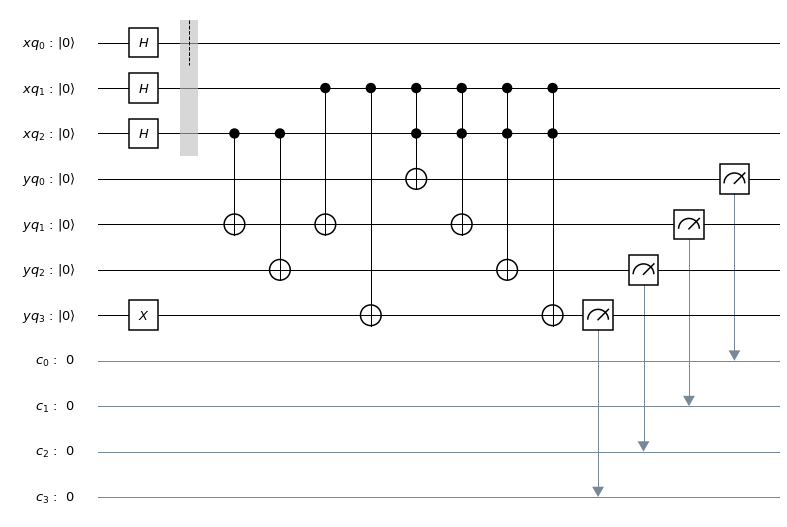

In [2]:
bx = 3
by = 4
cn = 4
qx = QuantumRegister(bx, "xq")
qy = QuantumRegister(by, "yq")
c = ClassicalRegister(cn)
qc = QuantumCircuit(qx, qy, c)


for i in range(bx):
    qc.h(qx[i])
qc.barrier(qx)

qc.x(qy[3])    
qc.cx(qx[2], qy[1])
qc.cx(qx[2], qy[2])
qc.cx(qx[1], qy[1])
qc.cx(qx[1], qy[3])
qc.ccx(qx[1], qx[2], qy[0])
qc.ccx(qx[1], qx[2], qy[1])
qc.ccx(qx[1], qx[2], qy[2])
qc.ccx(qx[1], qx[2], qy[3])

qc.measure(qy, c)
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

よって、次のように8通りの重ね合わせ状態の入力で、繰り返して関数値が現れるため、4通りの出力となる。

$$\left| f(0) \right\rangle + \left| f(1) \right\rangle + \left| f(2) \right\rangle + \left| f(3) \right\rangle + \left| f(4) \right\rangle + \left| f(5) \right\rangle + \left| f(6) \right\rangle + \left| f(7) \right\rangle \rightarrow \left| 1 \right\rangle + \left| 7 \right\rangle + \left| 4 \right\rangle + \left| 13 \right\rangle$$

## 12-3: 量子オラクル

量子オラクル
$$\left| x \right\rangle \left| y \right\rangle \xrightarrow{U_f} \left| x \right\rangle \left| y \oplus f(x) \right\rangle$$

$\left| y \right\rangle$を$\left| 0 \right\rangle$にすると、出力が$f(x)$のみになる。
$$\left| x \right\rangle \left| 0 \right\rangle \xrightarrow{U_f} \left| x \right\rangle \left| 0 \oplus f(x) \right\rangle = \left| x \right\rangle \left| f(x) \right\rangle$$

この式に重ね合わせ状態を適用すれば、関数$f(x)=7^x\ \mathrm{mod}\ 15$に対して、シフト不変性が機能し、位相の違いはあるが、次のようになる。

$$\left| 0 \right\rangle \left| 0 \right\rangle \xrightarrow{H \otimes I} \xrightarrow{U_f} \xrightarrow{QFT^{-1} \otimes I} \left( \left| 0 \right\rangle + \left| 2 \right\rangle + \left| 4 \right\rangle + \left| 6 \right\rangle \right) \left| f(x) \right\rangle$$

つまり、どの関数値$\left| 1 \right\rangle,\ \ \left| 4 \right\rangle,\ \ \left| 7 \right\rangle,\ \ \left| 13 \right\rangle$が観測されても、$\left| x \right\rangle$を逆量子フーリエ変換すれば、シフト不変性で位相の違いはあるが、すべて同じ量子状態$\left| 0 \right\rangle,\ \ \left| 2 \right\rangle,\ \ \left| 4 \right\rangle,\ \ \left| 6 \right\rangle$しか観測されないことになる。

$$\left| 0 \right\rangle \left| 0 \right\rangle + \left| 4 \right\rangle \left| 0 \right\rangle \rightarrow \left| 0 \right\rangle \left| f(0) \right\rangle + \left| 4 \right\rangle \left| f(4) \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle + \left| 4 \right\rangle \left| 1 \right\rangle = \left( \left| 0 \right\rangle + \left| 4 \right\rangle \right) \left| 1 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 1 \right\rangle$$

$$\left| 1 \right\rangle \left| 0 \right\rangle + \left| 5 \right\rangle \left| 0 \right\rangle \rightarrow \left| 1 \right\rangle \left| f(1) \right\rangle + \left| 5 \right\rangle \left| f(5) \right\rangle = \left| 1 \right\rangle \left| 7 \right\rangle + \left| 5 \right\rangle \left| 7 \right\rangle = \left( \left| 1 \right\rangle + \left| 5 \right\rangle \right) \left| 7 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 7 \right\rangle$$

$$\left| 2 \right\rangle \left| 0 \right\rangle + \left| 6 \right\rangle \left| 0 \right\rangle \rightarrow \left| 2 \right\rangle \left| f(2) \right\rangle + \left| 6 \right\rangle \left| f(6) \right\rangle = \left| 2 \right\rangle \left| 4 \right\rangle + \left| 6 \right\rangle \left| 4 \right\rangle = \left( \left| 2 \right\rangle + \left| 6 \right\rangle \right) \left| 4 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 4 \right\rangle$$

$$\left| 3 \right\rangle \left| 0 \right\rangle + \left| 7 \right\rangle \left| 0 \right\rangle \rightarrow \left| 3 \right\rangle \left| f(3) \right\rangle + \left| 7 \right\rangle \left| f(7) \right\rangle = \left| 3 \right\rangle \left| 13 \right\rangle + \left| 7 \right\rangle \left| 13 \right\rangle = \left( \left| 3 \right\rangle + \left| 7 \right\rangle \right) \left| 13 \right\rangle \rightarrow \left( \left| 0 \right\rangle,\left| 2 \right\rangle,\left| 4 \right\rangle,\left| 6 \right\rangle \right) \left| 13 \right\rangle$$

{'000': 260, '010': 262, '100': 253, '110': 249}


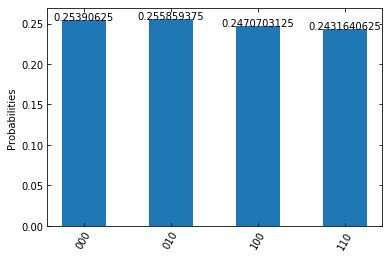

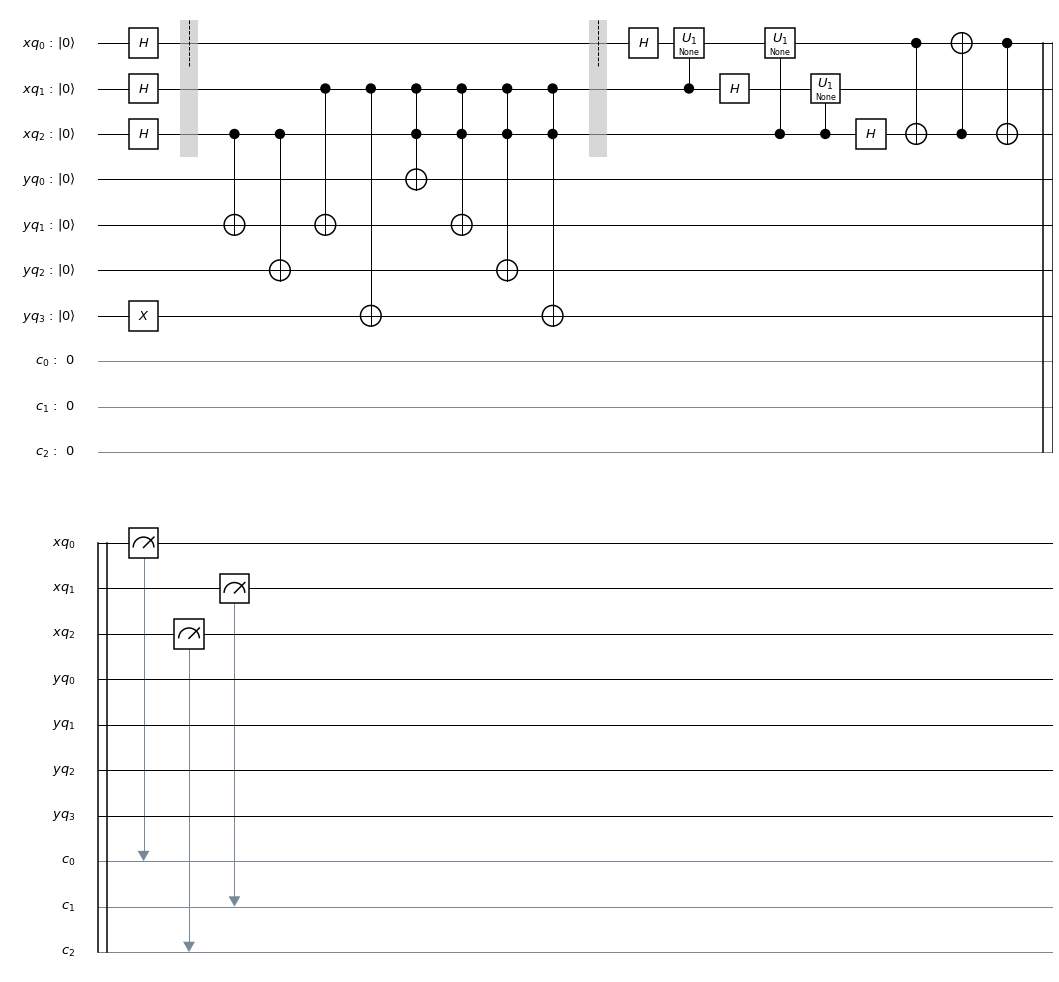

In [3]:
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-math.pi/float(2**(i-j)), q[i], q[j])
        qci.h(q[i])

def swap(qci, s1, s2):
    qci.cx(s1, s2)
    qci.cx(s2, s1)
    qci.cx(s1, s2)

bx = 3
by = 4
cn = 3
qx = QuantumRegister(bx, "xq")
qy = QuantumRegister(by, "yq")
c = ClassicalRegister(cn)
qc = QuantumCircuit(qx, qy, c)

for i in range(bx):
    qc.h(qx[i])
qc.barrier(qx)
qc.x(qy[3])    
qc.cx(qx[2], qy[1])
qc.cx(qx[2], qy[2])
qc.cx(qx[1], qy[1])
qc.cx(qx[1], qy[3])
qc.ccx(qx[1], qx[2], qy[0])
qc.ccx(qx[1], qx[2], qy[1])
qc.ccx(qx[1], qx[2], qy[2])
qc.ccx(qx[1], qx[2], qy[3])
qc.barrier(qx)
iqft(qc, qx, bx)
swap(qc, qx[0], qx[2])

qc.measure(qx, c)
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

量子ビット$\left| x \right\rangle$を観測して、観測値$s$として0, 2, 4, 6が得られたが、$k \in \{ 0,1,2,3,4,5,6,7\}$に対して、関数の周期$T$は、$k/T$の3ビットの推定として、次のように周期$T$として2と4が得られる。

$$s=2^3 \left( \frac{k}{T} \right) \rightarrow \frac{s}{8}=\frac{k}{T} = \left(
\begin{array}{r}
\frac{0}{8}=0 \rightarrow T=(\times) \\
\frac{2}{8}=\frac{1}{4} \rightarrow T=4(\circ) \\
\frac{4}{8}=\frac{1}{2} \rightarrow T=2(\times) \\
\frac{6}{8}=\frac{3}{4} \rightarrow T=4(\circ)
\end{array}
\right.$$

上の結果から、確率50%で、周期$T$が4と発見できる。
$T=r=4$は偶数なので、ユークリッドの互除法で最大公約数gcdを求めれば、$N=15$の因数3,5が求まる。

$$a^{r/2}\pm 1 = 7^{4/2} \pm 1 =\{48, 50\} \rightarrow \mathrm{gcd}(48, 15)=3,\ \ \mathrm{gcd}(50, 15)=5$$